CREATED BY SHAKED || ALL RIGHTS RESERVED

PLEASE DOWNLOAD THESE BEFORE USING THE CODE:

In [1]:
import sys, subprocess

subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", "requirements.txt"])


0

FIRST WE LOAD THE DATA TO UNDERSTAND WHAT WE ARE DEALING WITH :)

In [2]:
import json
import pandas as pd

with open("Datasets/events.json") as f:
    data = json.load(f)

df = pd.DataFrame(data)
print(df.head())
print(df.columns)
print(df.shape)


                                             Records
0  {'eventVersion': '1.08', 'userIdentity': {'typ...
1  {'eventVersion': '1.08', 'userIdentity': {'typ...
2  {'eventVersion': '1.08', 'userIdentity': {'typ...
3  {'eventVersion': '1.08', 'userIdentity': {'typ...
4  {'eventVersion': '1.08', 'userIdentity': {'typ...
Index(['Records'], dtype='object')
(107116, 1)


WE CAN SEE ABOVE THE FOLLOWING: ONE COLUMN CALLED 'Records' AND TOTAL OF 107116 EVENTS

FLATTEN THE CLOUDTRAIL RECORDS

In [3]:
records_df = pd.json_normalize(df["Records"])
print(records_df.shape)
records_df.head(10)



(107116, 946)


,eventVersion,eventTime,eventSource,eventName,awsRegion,sourceIPAddress,userAgent,responseElements,requestID,eventID,...,responseElements.vpc.dhcpOptionsId,responseElements.vpc.instanceTenancy,responseElements.vpc.tagSet.items,responseElements.vpc.isDefault,responseElements.keyPairId,requestParameters.fullyQualifiedArn.arnPrefix.partition,requestParameters.fullyQualifiedArn.arnPrefix.region,requestParameters.fullyQualifiedArn.arnPrefix.account,requestParameters.fullyQualifiedArn.relativeId.functionName,requestParameters.dryRun
0,1.08,2023-04-23T10:45:02Z,lambda.amazonaws.com,ListFunctions20150331,us-east-1,212.179.179.106,aws-sdk-go-v2/1.17.6 os/macos lang/go/1.19.8 m...,NaN,003011fb-368c-4c9c-be0a-06748de885d8,1c5ce35b-9daf-4edb-9caf-48ba82d71bf1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.08,2023-04-23T10:44:40Z,iam.amazonaws.com,GetCredentialReport,us-east-1,212.179.179.106,aws-sdk-go-v2/1.17.6 os/macos lang/go/1.19.8 m...,NaN,3977d934-4be7-40aa-8faf-d747825f8704,e247cda3-35b8-4ef8-a440-c2478b6d400f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.08,2023-04-23T10:44:39Z,iam.amazonaws.com,GetCredentialReport,us-east-1,212.179.179.106,aws-sdk-go-v2/1.17.6 os/macos lang/go/1.19.8 m...,NaN,0e50e798-b866-4351-a5f9-18b5ea76a643,d257ea8a-e162-47d4-8b8e-6ae1d14df751,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.08,2023-04-23T10:44:30Z,iam.amazonaws.com,GetCredentialReport,us-east-1,212.179.179.106,aws-sdk-go-v2/1.17.6 os/macos lang/go/1.19.8 m...,NaN,74269e4e-1bd1-49ef-9b63-32b0b72c7595,653e7bd9-6d8b-49b5-8fbf-40d443bc06c4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.08,2023-04-23T10:44:26Z,iam.amazonaws.com,GetAccountPasswordPolicy,us-east-1,212.179.179.106,aws-sdk-go-v2/1.17.6 os/macos lang/go/1.19.8 m...,NaN,b7f8cc32-23a6-4904-ba0b-671f894096fa,ef4679c3-6880-4ae2-8679-96bd8872b068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.08,2023-04-23T10:44:25Z,iam.amazonaws.com,GetCredentialReport,us-east-1,212.179.179.106,aws-sdk-go-v2/1.17.6 os/macos lang/go/1.19.8 m...,NaN,72141a1f-79f3-403c-91e7-65df9176ece4,78a2a10a-ff47-4480-be23-6e92891fb8c8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.08,2023-04-23T10:44:25Z,iam.amazonaws.com,GetCredentialReport,us-east-1,212.179.179.106,aws-sdk-go-v2/1.17.6 os/macos lang/go/1.19.8 m...,NaN,ea1baf91-beae-42b3-86d8-3f0b4a3487ce,7a1f6fc7-2b83-4f9c-ab25-696d613448f4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.08,2023-04-23T10:44:24Z,iam.amazonaws.com,GetCredentialReport,us-east-1,212.179.179.106,aws-sdk-go-v2/1.17.6 os/macos lang/go/1.19.8 m...,NaN,995a648a-1e10-4ae6-88ac-f56a0bbda8cd,8241f550-e656-4714-b4f9-58c28bb6611f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.08,2023-04-23T10:44:24Z,iam.amazonaws.com,ListVirtualMFADevices,us-east-1,212.179.179.106,aws-sdk-go-v2/1.17.6 os/macos lang/go/1.19.8 m...,NaN,998092f5-6bf2-4c7b-ac1f-95bbb7940070,a7eb5d7a-e077-4877-a9db-8c10c49c31bf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.08,2023-04-23T10:44:22Z,iam.amazonaws.com,GetCredentialReport,us-east-1,212.179.179.106,aws-sdk-go-v2/1.17.6 os/macos lang/go/1.19.8 m...,NaN,c44cf301-87e2-46ad-8690-aa7fd1640a1c,ed34ee07-8051-4188-b244-ba424291318c,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## LABEL DEFINITION (NORMAL VS ANOMALY)

THE DATA FILE DOES NOT CONTAIN AN EXPLICIT LABEL COLUMN.
THEREFORE, I DEFINE A BINARY LABEL USING A CLEAR RULE:
- IF `errorCode` IS PRESENT → ANOMALY (1)
- OTHERWISE → NORMAL (0)

THIS IS REASONABLE FOR CLOUDTRAIL LOGS BECAUSE FAILED/UNAUTHORIZED ACTIONS OFTEN APPEAR WITH ERROR CODES.


SELECT FEATURES AND CREATE THE LABEL

In [4]:
#  Anomaly (1) || Normal (0)

if "errorCode" not in records_df.columns:
    raise ValueError("errorCode column not found in records_df. We need a different labeling rule.")

records_df["label"] = records_df["errorCode"].notna().astype(int)

print(records_df["label"].value_counts())


label
0    92422
1    14694
Name: count, dtype: int64


In [5]:
selected_cols = [
    "eventName",
    "eventSource",
    "awsRegion",
    "sourceIPAddress",
    "userAgent",
    "eventType",
    "readOnly",
]

selected_cols = [c for c in selected_cols if c in records_df.columns]

work_df = records_df[selected_cols + ["label"]].copy()
work_df = work_df.fillna("Unknown")

work_df.head(10)


,eventName,eventSource,awsRegion,sourceIPAddress,userAgent,eventType,readOnly,label
0,ListFunctions20150331,lambda.amazonaws.com,us-east-1,212.179.179.106,aws-sdk-go-v2/1.17.6 os/macos lang/go/1.19.8 m...,AwsApiCall,True,0
1,GetCredentialReport,iam.amazonaws.com,us-east-1,212.179.179.106,aws-sdk-go-v2/1.17.6 os/macos lang/go/1.19.8 m...,AwsApiCall,True,1
2,GetCredentialReport,iam.amazonaws.com,us-east-1,212.179.179.106,aws-sdk-go-v2/1.17.6 os/macos lang/go/1.19.8 m...,AwsApiCall,True,1
3,GetCredentialReport,iam.amazonaws.com,us-east-1,212.179.179.106,aws-sdk-go-v2/1.17.6 os/macos lang/go/1.19.8 m...,AwsApiCall,True,1
4,GetAccountPasswordPolicy,iam.amazonaws.com,us-east-1,212.179.179.106,aws-sdk-go-v2/1.17.6 os/macos lang/go/1.19.8 m...,AwsApiCall,True,1
5,GetCredentialReport,iam.amazonaws.com,us-east-1,212.179.179.106,aws-sdk-go-v2/1.17.6 os/macos lang/go/1.19.8 m...,AwsApiCall,True,1
6,GetCredentialReport,iam.amazonaws.com,us-east-1,212.179.179.106,aws-sdk-go-v2/1.17.6 os/macos lang/go/1.19.8 m...,AwsApiCall,True,1
7,GetCredentialReport,iam.amazonaws.com,us-east-1,212.179.179.106,aws-sdk-go-v2/1.17.6 os/macos lang/go/1.19.8 m...,AwsApiCall,True,1
8,ListVirtualMFADevices,iam.amazonaws.com,us-east-1,212.179.179.106,aws-sdk-go-v2/1.17.6 os/macos lang/go/1.19.8 m...,AwsApiCall,True,0
9,GetCredentialReport,iam.amazonaws.com,us-east-1,212.179.179.106,aws-sdk-go-v2/1.17.6 os/macos lang/go/1.19.8 m...,AwsApiCall,True,1


CREATE X AND Y:

X = THE INPUT FEATURES (WHAT THE MODEL LEARNS FROM)

y = THE LABELS / TARGET (WHAT THE MODEL SHOULD PREDICT)

In [6]:
X = pd.get_dummies(work_df.drop(columns=["label"]), drop_first=True)
y = work_df["label"]

print(X.shape)
print(y.value_counts())


(107116, 5067)
label
0    92422
1    14694
Name: count, dtype: int64


## USING LOGISTIC REGRESSION

LOGISTIC REGRESSION IS A **SUPERVISED CLASSIFICATION ALGORITHM** USED TO PREDICT A **CLASS LABEL** (E.G., **NORMAL VS ANOMALY**).

### WHAT IT DOES:

- IT TAKES YOUR INPUT FEATURES **X** (IN THIS PROJECT: **ONE-HOT ENCODED CLOUDTRAIL FIELDS**).
- IT COMPUTES A **WEIGHTED SUM**:

$$
z = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_n x_n
$$

- THEN IT CONVERTS THAT NUMBER INTO A **PROBABILITY** USING THE **SIGMOID FUNCTION**:

$$
p = \frac{1}{1 + e^{-z}}
$$

- THIS PROBABILITY $p$ IS THE MODEL’S ESTIMATE THAT THE EVENT IS **ANOMALY (CLASS 1)**.


## OPTION 2: USING LINEAR SVM (LINEARSVC)

LINEAR SVM (SUPPORT VECTOR MACHINE) IS A **SUPERVISED CLASSIFICATION ALGORITHM** USED TO PREDICT A **CLASS LABEL** (E.G., **NORMAL VS ANOMALY**).

### WHAT IT DOES:

- IT TAKES YOUR INPUT FEATURES **X** (IN THIS PROJECT: **ONE-HOT ENCODED CLOUDTRAIL FIELDS**).
- IT FINDS A **LINEAR DECISION BOUNDARY (HYPERPLANE)** THAT SEPARATES THE TWO CLASSES:

$$
f(x) = w^\top x + b
$$

- THE MODEL PREDICTS THE CLASS BY THE **SIGN** OF THIS SCORE:

$$
\hat{y} =
\begin{cases}
1 & \text{IF } f(x) \ge 0 \\
0 & \text{IF } f(x) < 0
\end{cases}
$$

- DURING TRAINING, THE SVM CHOOSES \(w\) AND \(b\) TO **MAXIMIZE THE MARGIN** BETWEEN CLASSES, WHILE ALLOWING SOME MISCLASSIFICATIONS (SOFT MARGIN). THIS IS CONTROLLED BY THE REGULARIZATION PARAMETER \(C\).


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, accuracy_score

# 1) Split once (fair comparison)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2) Train models
lr_clf = LogisticRegression(max_iter=2000, class_weight="balanced")
lr_clf.fit(X_train, y_train)

svm_clf = LinearSVC(class_weight="balanced", random_state=42, dual="auto", max_iter=20000)
svm_clf.fit(X_train, y_train)

# 3) Predict
y_pred_lr = lr_clf.predict(X_test)
y_pred_svm = svm_clf.predict(X_test)

# 4) Store results
results_df = pd.DataFrame([
    {
        "MODEL": "LOGISTIC REGRESSION",
        "F1_CLASS_1": f1_score(y_test, y_pred_lr),
        "ACCURACY": accuracy_score(y_test, y_pred_lr),
    },
    {
        "MODEL": "LINEAR SVM (LinearSVC)",
        "F1_CLASS_1": f1_score(y_test, y_pred_svm),
        "ACCURACY": accuracy_score(y_test, y_pred_svm),
    }
])

results_df


,MODEL,F1_CLASS_1,ACCURACY
0,LOGISTIC REGRESSION,0.880114,0.964712
1,LINEAR SVM (LinearSVC),0.885846,0.966533


In [8]:
# #Logistic Regression
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import f1_score, accuracy_score
#
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )
#
# lr_clf = LogisticRegression(max_iter=2000, class_weight="balanced")
# lr_clf.fit(X_train, y_train)
#
# y_pred_lr = lr_clf.predict(X_test)
#
# lr_f1 = f1_score(y_test, y_pred_lr)
# lr_acc = accuracy_score(y_test, y_pred_lr)
#
#
# #Linear SVM (LinearSVC)
# from sklearn.svm import LinearSVC
# from sklearn.metrics import f1_score, accuracy_score
#
# svm_clf = LinearSVC(
#     class_weight="balanced",
#     random_state=42,
#     dual="auto",
#     max_iter=20000
# )
#
# svm_clf.fit(X_train, y_train)
#
# y_pred_svm = svm_clf.predict(X_test)
#
# svm_f1 = f1_score(y_test, y_pred_svm)
# svm_acc = accuracy_score(y_test, y_pred_svm)
#
# print("Logistic Regression:")
# print("  F1-score:", lr_f1)
# print("  Accuracy:", lr_acc)
#
# print("\nLinear SVM (LinearSVC):")
# print("  F1-score:", svm_f1)
# print("  Accuracy:", svm_acc)
#
# # from sklearn.model_selection import train_test_split
# # from sklearn.linear_model import LogisticRegression
# # from sklearn.metrics import f1_score, classification_report
# #
# #
# # X1_train, X1_test, y1_train, y1_test = train_test_split(
# #     X, y, test_size=0.2, random_state=42, stratify=y
# # )
# #
# # clf = LogisticRegression(max_iter=2000, class_weight="balanced")
# # clf.fit(X1_train, y1_train)
# #
# # y_pred = clf.predict(X1_test)
# #
# # print("F1-score:", f1_score(y_test, y_pred))
# # print(classification_report(y_test, y_pred, digits=4))
# #
# #
# #
# # ##### option2:
# #
# # from sklearn.model_selection import train_test_split
# # from sklearn.svm import LinearSVC
# # from sklearn.metrics import f1_score, classification_report
# #
# # X_train, X_test, y_train, y_test = train_test_split(
# #     X, y, test_size=0.2, random_state=42, stratify=y
# # )
# #
# # clf = LinearSVC(
# #     class_weight="balanced",
# #     random_state=42,
# #     dual="auto",
# #     max_iter=20000
# # )
# #
# # clf.fit(X_train, y_train)
# # y_pred = clf.predict(X_test)
# #
# # print("F1-score:", f1_score(y_test, y_pred))
# # print(classification_report(y_test, y_pred, digits=4))


LET'S SEE CHARTS AND GRAPHS:


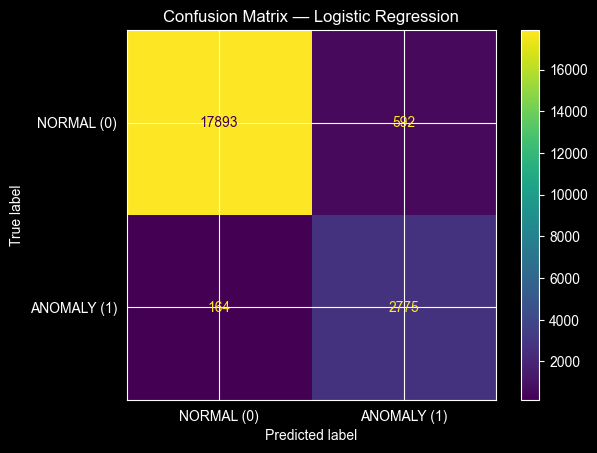

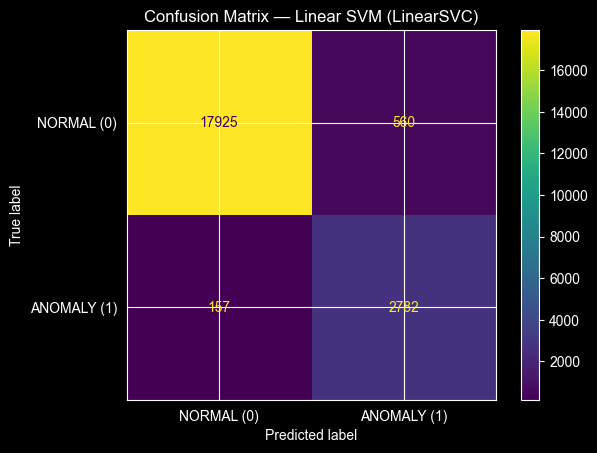

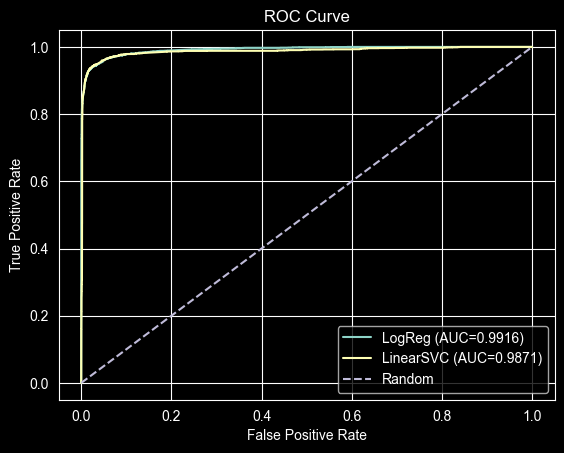

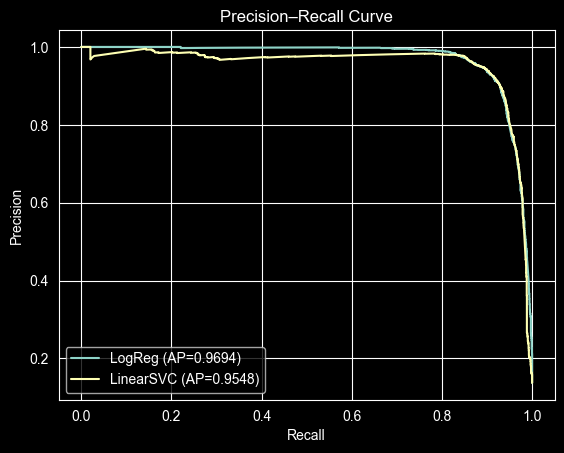

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import (
    ConfusionMatrixDisplay, confusion_matrix,
    roc_curve, auc,
    precision_recall_curve, average_precision_score
)

# Scores for ROC/PR
# Logistic Regression has probabilities:
y_score_lr = lr_clf.predict_proba(X_test)[:, 1]

# LinearSVC uses decision scores:
y_score_svm = svm_clf.decision_function(X_test)

#Confusion Matrices
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_lr),
    display_labels=["NORMAL (0)", "ANOMALY (1)"]
).plot(values_format="d")
plt.title("Confusion Matrix — Logistic Regression")
plt.show()

ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_svm),
    display_labels=["NORMAL (0)", "ANOMALY (1)"]
).plot(values_format="d")
plt.title("Confusion Matrix — Linear SVM (LinearSVC)")
plt.show()

#ROC Curve (both models)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC={auc(fpr_lr, tpr_lr):.4f})")
plt.plot(fpr_svm, tpr_svm, label=f"LinearSVC (AUC={auc(fpr_svm, tpr_svm):.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

p_lr, r_lr, _ = precision_recall_curve(y_test, y_score_lr)
p_svm, r_svm, _ = precision_recall_curve(y_test, y_score_svm)

ap_lr = average_precision_score(y_test, y_score_lr)
ap_svm = average_precision_score(y_test, y_score_svm)

plt.figure()
plt.plot(r_lr, p_lr, label=f"LogReg (AP={ap_lr:.4f})")
plt.plot(r_svm, p_svm, label=f"LinearSVC (AP={ap_svm:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.show()



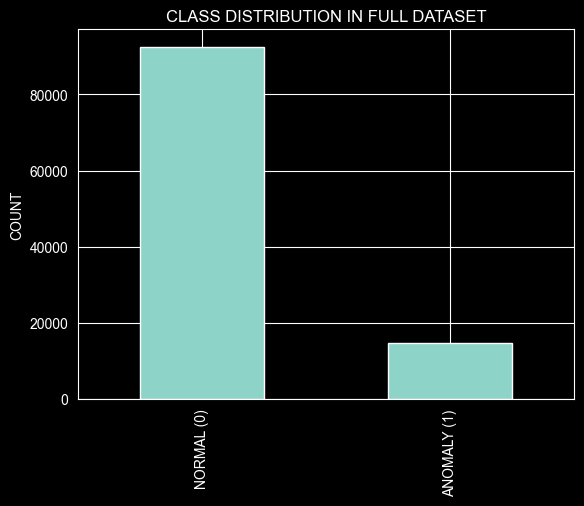

In [12]:
import pandas as pd

counts = pd.Series(y).value_counts().sort_index()
counts.index = ["NORMAL (0)", "ANOMALY (1)"]

counts.plot(kind="bar")
plt.title("CLASS DISTRIBUTION IN FULL DATASET")
plt.ylabel("COUNT")
plt.show()


Extra graphs (bar chart, errors, threshold tradeoff, class distribution)

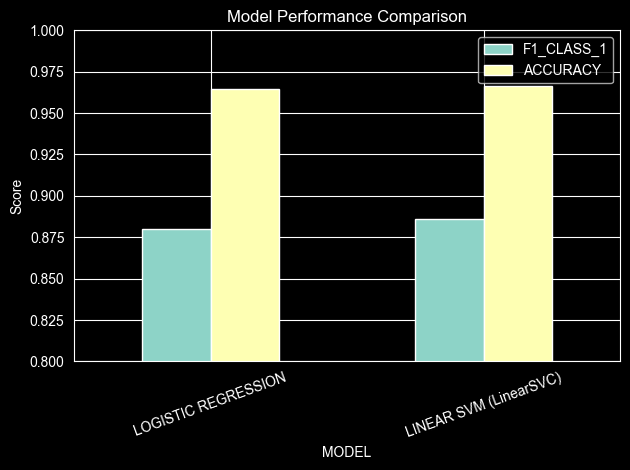

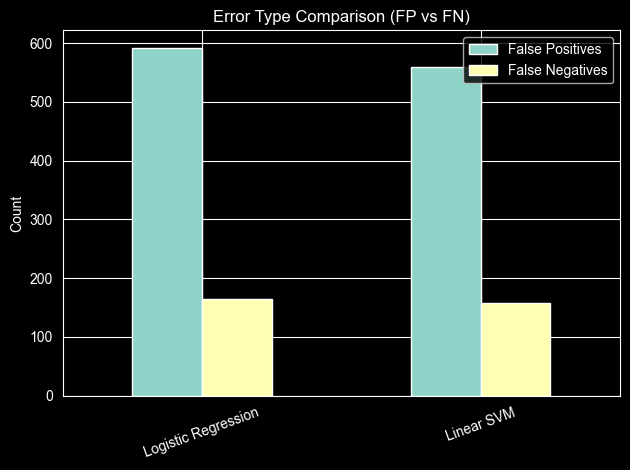

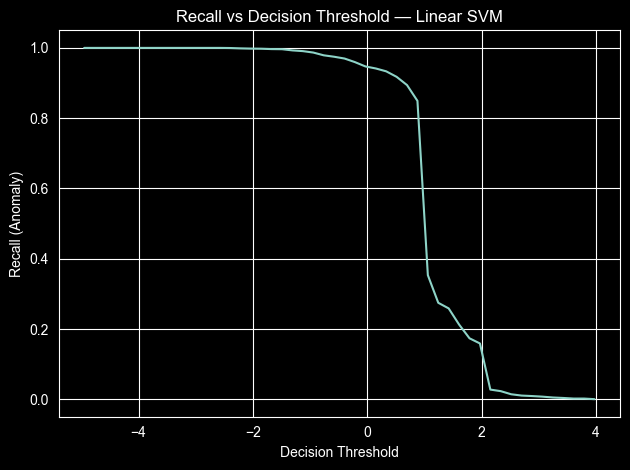

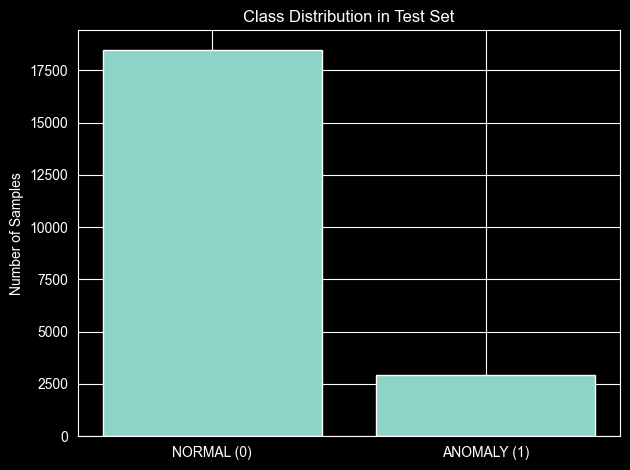

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# 1) Performance bar chart (F1 + Accuracy)
metrics_df = results_df.set_index("MODEL")
metrics_df[["F1_CLASS_1", "ACCURACY"]].plot(kind="bar")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# 2) Error type comparison (FP vs FN)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_svm = confusion_matrix(y_test, y_pred_svm)

errors = pd.DataFrame({
    "False Positives": [cm_lr[0, 1], cm_svm[0, 1]],
    "False Negatives": [cm_lr[1, 0], cm_svm[1, 0]]
}, index=["Logistic Regression", "Linear SVM"])

errors.plot(kind="bar")
plt.title("Error Type Comparison (FP vs FN)")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# 3) Recall vs threshold (Linear SVM)
thresholds = np.linspace(y_score_svm.min(), y_score_svm.max(), 50)
recalls = []

for t in thresholds:
    y_thresh = (y_score_svm >= t).astype(int)
    tp = ((y_thresh == 1) & (y_test == 1)).sum()
    fn = ((y_thresh == 0) & (y_test == 1)).sum()
    recalls.append(tp / (tp + fn))

plt.figure()
plt.plot(thresholds, recalls)
plt.title("Recall vs Decision Threshold — Linear SVM")
plt.xlabel("Decision Threshold")
plt.ylabel("Recall (Anomaly)")
plt.tight_layout()
plt.show()

# 4) Class distribution in test set (sanity check)
labels, counts = np.unique(y_test, return_counts=True)
plt.figure()
plt.bar(["NORMAL (0)", "ANOMALY (1)"], counts)
plt.title("Class Distribution in Test Set")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()
